In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/drug200.csv


In [2]:
df = pd.read_csv("/kaggle/input/drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [5]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


# **Wizualizacje**

#### Używane biblioteki

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


warnings.filterwarnings("ignore")

##### Ustawienie kolorystyki wizualizacji

In [7]:
sns.set_palette("bright")

### Rozkład stosunku sodu do potasu w krwi pacjentów

Text(0, 0.5, 'Objętość')

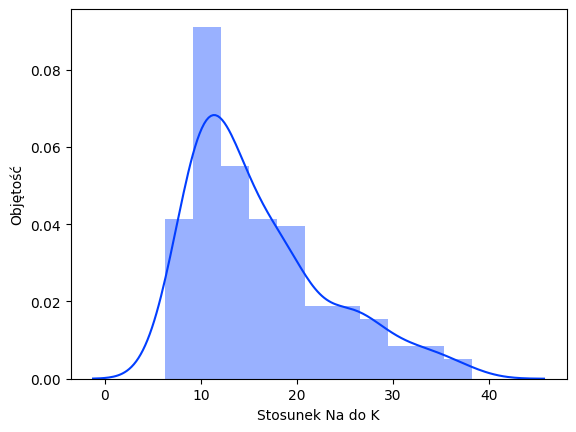

In [8]:
sns.distplot(df['Na_to_K']);

plt.xlabel('Stosunek Na do K')
plt.ylabel('Objętość')

Stosunek sodu do potasu u pacjentów najczęściej wynosi ~10.

### Rozkład wieku pacjentów

Text(0, 0.5, 'Objętość')

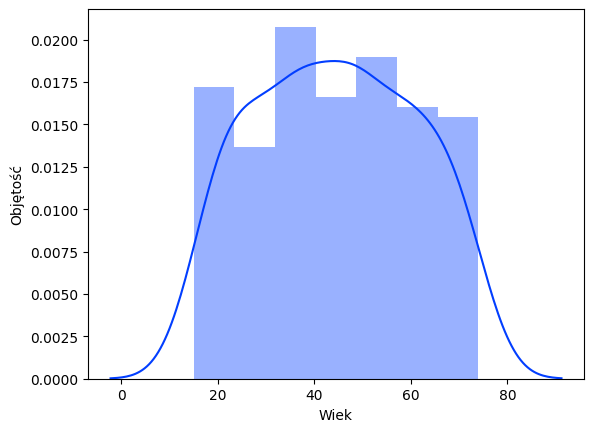

In [9]:
sns.distplot(df['Age']);

plt.xlabel('Wiek')
plt.ylabel('Objętość')

Można zauważyć, że wiek jest równo rozłożony w zbiorze, jednak najwięcej pacjentów posiada około 30 do 40 lat.

### Liczba poszczególnych leków przydzielanych do pacjentów w zbiorze danych

Text(0, 0.5, 'Liczba')

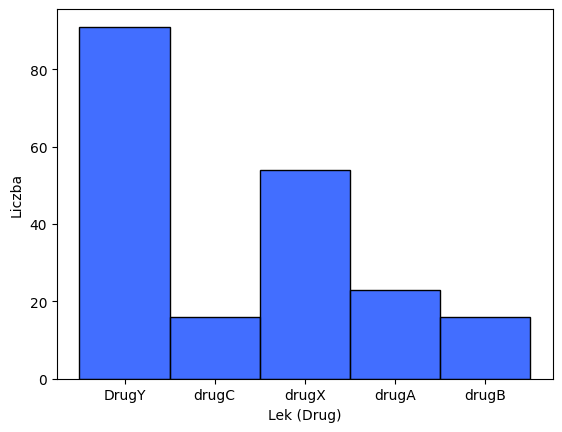

In [10]:
sns.histplot(data=df, x="Drug")

plt.xlabel('Lek (Drug)')
plt.ylabel('Liczba')

W zbiorze najwięcej razy występuje lek DrugY, następnie drugX, a pozostałe leki występują w podobnej ilości.

### Rozkład pomiarów ciśnienia krwi

Text(0, 0.5, 'Liczba')

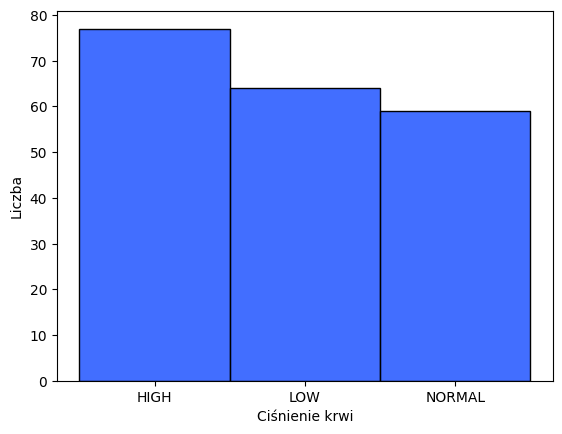

In [11]:
sns.histplot(data=df, x="BP")

plt.xlabel('Ciśnienie krwi')
plt.ylabel('Liczba')

Ciśnienie krwi pacjentów występuje podobnie w zbiorze, jednak najczęśniej pojawia się wysokie ciśnienie.

### Rozkład pomiarów cholesterolu

Text(0, 0.5, 'Liczba')

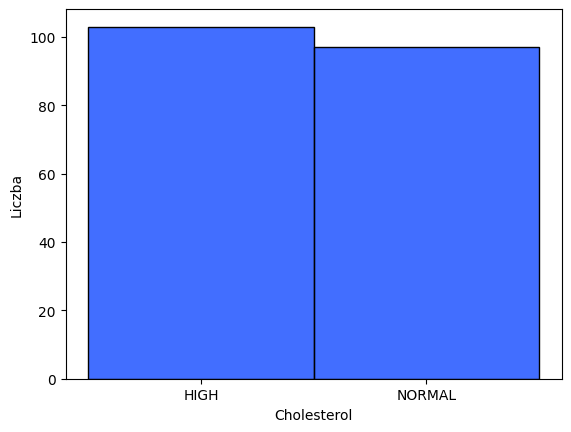

In [12]:
sns.histplot(data=df, x="Cholesterol")

plt.xlabel('Cholesterol')
plt.ylabel('Liczba')

Pomiary cholesterolu występują podobnie w zbiorze w podobnej ilości z niewielką przewagą wysokiego poziomu cholesterolu.

### Rozkład pomiarów ciśnienia krwi ze względu na cholesterol

<Axes: xlabel='BP', ylabel='count'>

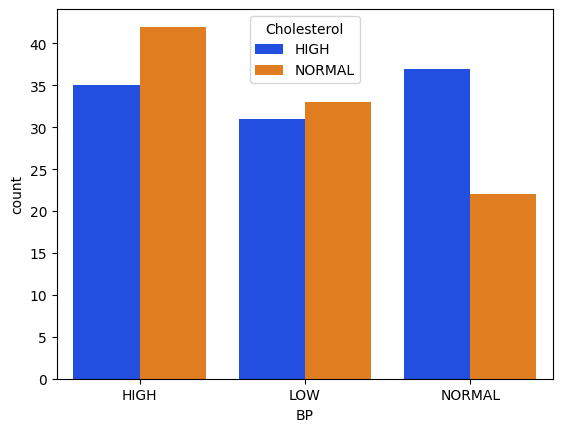

In [13]:
sns.countplot(df, x="BP", hue="Cholesterol")

Dla wysokiego cholesterolu rozkład ciśnienia krwi jest równomierny, jednak przy normalnym poziomie cholesterolu przeważa wysokie ciśnienie krwi, a przy normalnym ciśnieniu krwi przeważa wysoki poziom cholesterolu.

### Rozkład pomiarów ciśnienia krwi ze względu na płeć

<Axes: xlabel='BP', ylabel='count'>

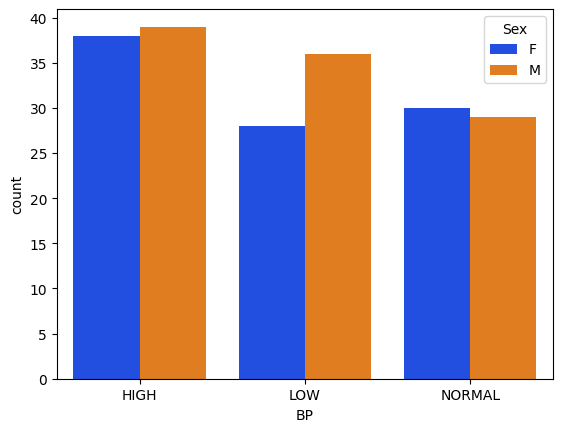

In [14]:
sns.countplot(df, x="BP", hue="Sex")

U kobiet oraz mężczyzn przeważa wysokie ciśnienie krwi, jednak u kobiet różnica między wysokim i niskim ciśnieniem jest większa.

### Rozkład pomiarów cholesterolu ze względu na płeć

<Axes: xlabel='Cholesterol', ylabel='count'>

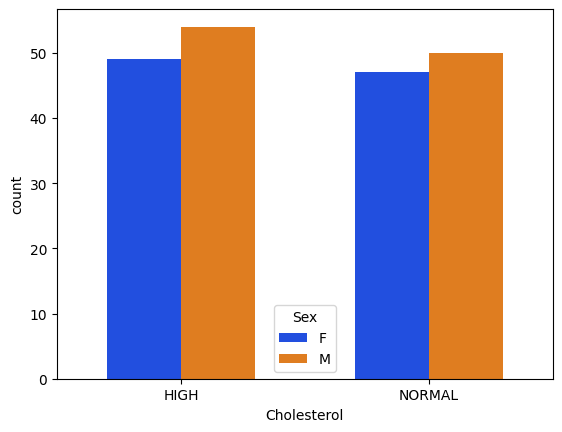

In [15]:
sns.countplot(df, x="Cholesterol", hue="Sex", width=0.6)

U kobiet i mężczyzn można zaobserwować równomierny rozkład poziomu cholesterolu, jednak z przewagą wysokiego poziomu cholesterolu u obu grup.

### Rozkład płci

Text(0, 0.5, 'Liczba')

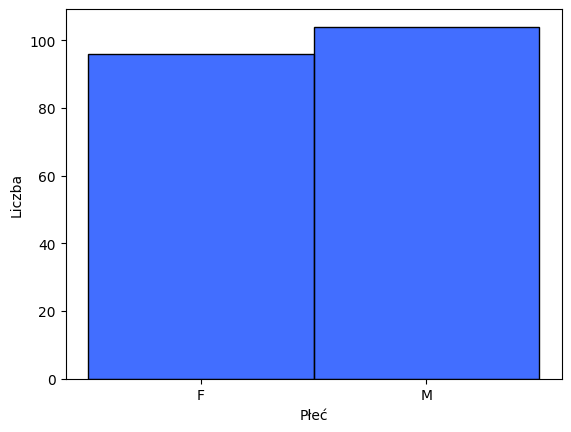

In [16]:
sns.histplot(data=df, x="Sex")

plt.xlabel('Płeć')
plt.ylabel('Liczba')

Liczba mężczyzn w zbiorze jest niewiele większa niż liczba kobiet.

### Rozkład wieku pacjentów ze względu na płeć

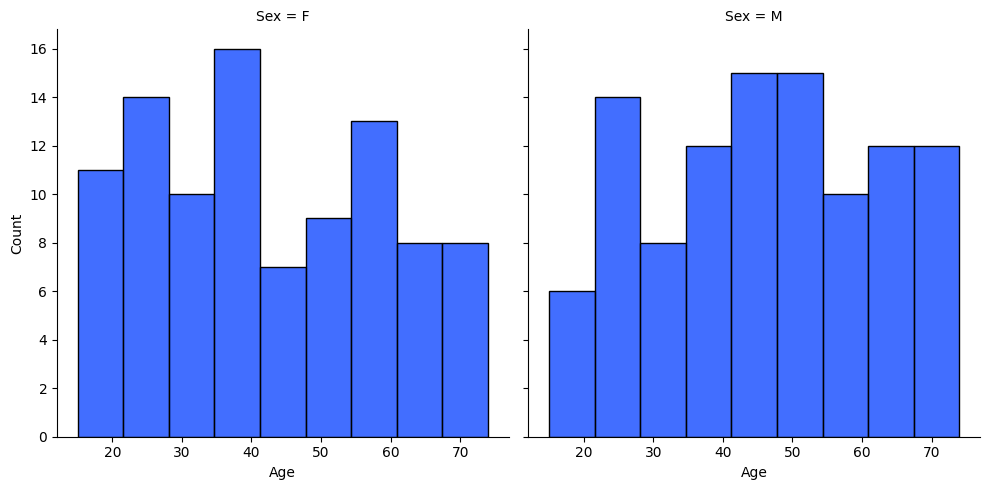

In [17]:
sns.displot(df, x="Age", col="Sex")

U kobiet można zaobserować większą liczbę badanych w wieku mniejszym niż 40 lat, jednak większość mężczyzn w zbiorze posiada więcej niż 60 lat.

### Rozkład przydzielonych leków ze względu na płeć

<Axes: xlabel='Drug', ylabel='count'>

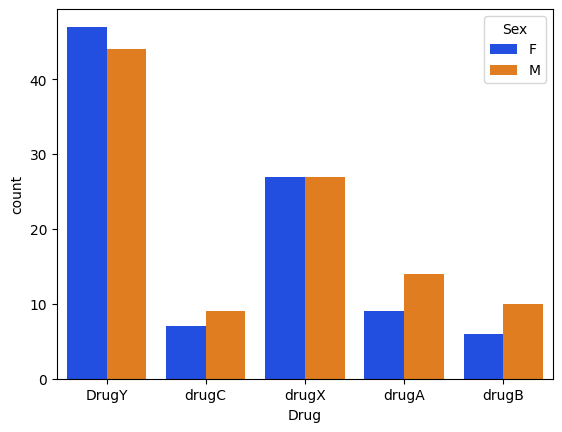

In [18]:
sns.countplot(df, x="Drug", hue="Sex")

W obu grupach lek został przydzielony w podobnym stosunku.

### Stosunek Na do K w krwi ze względu na płeć

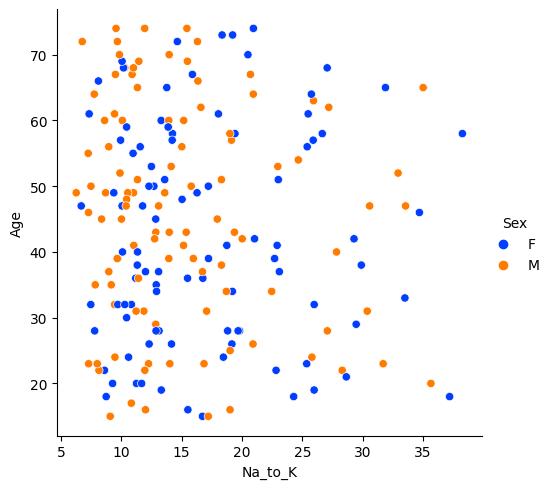

In [19]:
sns.relplot(data=df, x="Na_to_K", y="Age", hue="Sex")

Można zaobserwować, że niezależnie od wieku, stosunek sodu do potasu we krwi pacjentów jest równomierny.

### Rozkład leku ze względu na ciśnienie krwi

<Axes: xlabel='Drug', ylabel='count'>

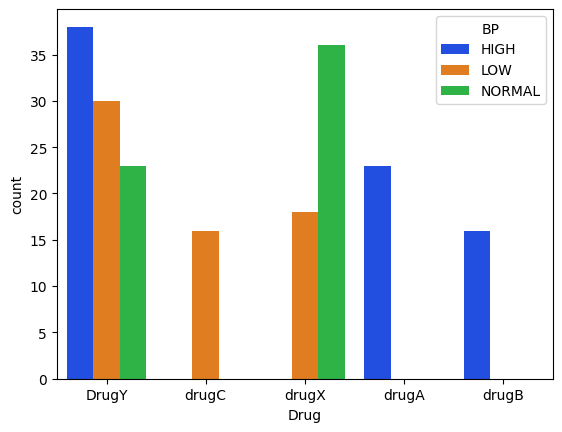

In [20]:
sns.countplot(data=df, x="Drug", hue="BP")

Dla pacjentów z wysokim ciśnieniem krwi zostały przypisane leki DrugY, drugA oraz drugB, a dla pacjentów z niskim ciśnieniem zostały przypisane leki DrugY, drugC i drugX. Dla pacjentów z normalnym ciśnieniem krwi zostały przypisane jedynie leki DrugY i drugX. Jedynym lekiem, do którego są przypisani pacjenci ze wszystkimi pomiarami ciśnienia krwi jest DrugY.

### Rozkład leku ze względu na poziom cholesterolu

<Axes: xlabel='Drug', ylabel='count'>

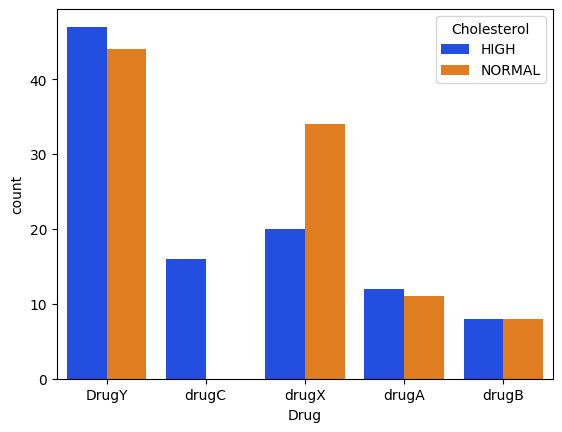

In [21]:
sns.countplot(data=df, x="Drug", hue="Cholesterol")

DrugY, drugA oraz drugB zostały równomiernie przypisane do pacjentów dla poszczególnych poziomów cholesterolu. Dla leku drugC zostali przypisani jedynie pacjenci z wysokim poziomem cholesterolu, a przy leku drugX przeważają pacjenci z normalnym poziomem cholesterolu.